# Problem Statement 

Suppose that you are working as a data analyst at Airbnb. For the past few months, Airbnb has seen a major decline in revenue. Now that the restrictions have started lifting and people have started to travel more, Airbnb wants to make sure that it is fully prepared for this change.

 

The different leaders at Airbnb want to understand some important insights based on various attributes in the dataset so as to increase the revenue such as -

Which type of hosts to acquire more and where?
The categorisation of customers based on their preferences.
What are the neighbourhoods they need to target?
What is the pricing ranges preferred by customers?
The various kinds of properties that exist w.r.t. customer preferences.
Adjustments in the existing properties to make it more customer-oriented

## Columns Discription

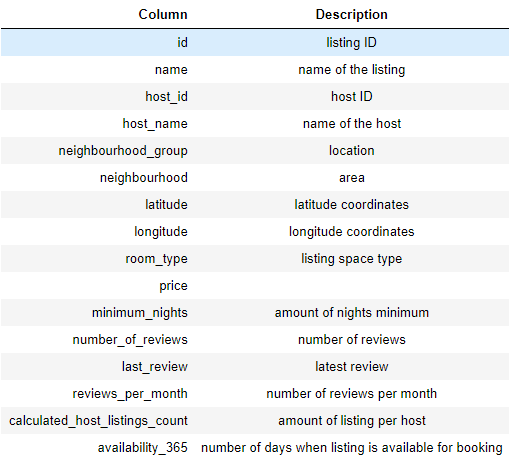

In [1]:
# Import the library to be used

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
# Reading the Data
bnb = pd.read_csv(r"C:\Users\amann\Downloads\AB_NYC_2019.csv")

In [3]:
bnb.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,19-10-2018,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,21-05-2019,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,05-07-2019,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,19-11-2018,0.10,1,0


In [4]:
bnb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [5]:
## Checking the column Name's.
bnb.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [6]:
#Checking number of Rows and columns.
bnb.shape

(48895, 16)

In [7]:
#Checking for duplicates in 'name' column.
boolean = bnb.duplicated(subset = ['name']).any()
boolean

True

In [8]:
#Checking for duplicates in 'host_id' column.
boolean = bnb.duplicated(subset = ['host_id']).any()
boolean

True

In [9]:
## Code for compairing the duplicate Values in 'name' , 'host_id' AND 'id'.
bnb2 = bnb.loc[bnb.duplicated(keep = 'first'), : ]
bnb2.head()


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365





With the above information we understand that there are no duplicate entries in the data as 'id' column confirms that all enries are unique.

Latitude and Longitude column is not relevent to us, as all the data is from NY City only.
When we have host ID we don't need host name. Thus we will be droping the 'latitude' , 'longitude', and 'host_name' columns.



In [10]:
bnb = bnb.drop(['latitude','longitude', 'host_name'], axis =1)
bnb.head()

,id,name,host_id,neighbourhood_group,neighbourhood,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,Brooklyn,Kensington,Private room,149,1,9,19-10-2018,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Manhattan,Midtown,Entire home/apt,225,1,45,21-05-2019,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Manhattan,Harlem,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,Brooklyn,Clinton Hill,Entire home/apt,89,1,270,05-07-2019,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Manhattan,East Harlem,Entire home/apt,80,10,9,19-11-2018,0.10,1,0


In [11]:
#Checking if any extra rows at the end of data, it is allways a good practice to do so. 
bnb.tail(10)

,id,name,host_id,neighbourhood_group,neighbourhood,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
48885,36482809,Stunning Bedroom NYC! Walking to Central Park!!,131529729,Manhattan,East Harlem,Private room,75,2,0,NaN,NaN,2,353
48886,36483010,Comfy 1 Bedroom in Midtown East,274311461,Manhattan,Midtown,Entire home/apt,200,6,0,NaN,NaN,1,176
48887,36483152,Garden Jewel Apartment in Williamsburg New York,208514239,Brooklyn,Williamsburg,Entire home/apt,170,1,0,NaN,NaN,3,365
48888,36484087,"Spacious Room w/ Private Rooftop, Central loca...",274321313,Manhattan,Hell's Kitchen,Private room,125,4,0,NaN,NaN,1,31
48889,36484363,QUIT PRIVATE HOUSE,107716952,Queens,Jamaica,Private room,65,1,0,NaN,NaN,2,163
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Brooklyn,Bedford-Stuyvesant,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Brooklyn,Bushwick,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Manhattan,Harlem,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Manhattan,Hell's Kitchen,Shared room,55,1,0,NaN,NaN,6,2
48894,36487245,Trendy duplex in the very heart of Hell's Kitchen,68119814,Manhattan,Hell's Kitchen,Private room,90,7,0,NaN,NaN,1,23


In [12]:
# Checking new number of Rows and columns.
bnb.shape

(48895, 13)

In [13]:
#checking How many colums have null value in them.
nulval = ((bnb.isnull().sum()>0).sum())
nulval

3


#### Checking which columns have missing values


In [14]:
bnb.isnull().sum()

id                                    0
name                                 16
host_id                               0
neighbourhood_group                   0
neighbourhood                         0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

## Handeling missing values

In [15]:
## what percentahe of value is missing
missing_name = float(100*16/48895)
missing_last_review = float(100*10052/48895)
print(missing_name)
print(missing_last_review)

0.03272318232948154
20.55833929849678


In [16]:
## Droping 'Name' null record as they comprise of only 0.03% of data. 
bnb1 = bnb[~bnb.name.isnull()].copy()
bnb1.shape

(48879, 13)

In [17]:
bnb1.isnull().sum()

id                                    0
name                                  0
host_id                               0
neighbourhood_group                   0
neighbourhood                         0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10042
reviews_per_month                 10042
calculated_host_listings_count        0
availability_365                      0
dtype: int64

Assuming that 'reviews_per_month' column is blank because no reviews have been posted.
Thus we can fill it up with 0.

In [18]:
## Filling '0' in place of 'null' in 'newviews_per_month'
bnb1['reviews_per_month'] = bnb1['reviews_per_month'].replace(np.nan, 0)
bnb1['reviews_per_month'].isnull().sum()

0

In [19]:
# Now only 'Last_review' column is left and it is about 20% of the data missing. 
# We can drop the column to clean our data completly.

bnb1 = bnb1.drop(['last_review'], axis = 1)
bnb1.head()

,id,name,host_id,neighbourhood_group,neighbourhood,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,Brooklyn,Kensington,Private room,149,1,9,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Manhattan,Midtown,Entire home/apt,225,1,45,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Manhattan,Harlem,Private room,150,3,0,0.00,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,Brooklyn,Clinton Hill,Entire home/apt,89,1,270,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Manhattan,East Harlem,Entire home/apt,80,10,9,0.10,1,0


In [20]:
bnb1.isnull().sum()

id                                0
name                              0
host_id                           0
neighbourhood_group               0
neighbourhood                     0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

# Now data is cleaned we can start exploring it more:-

In [21]:
# Starting with 'price' Column.
bnb1.price.describe()

count    48879.000000
mean       152.722355
std        240.186804
min          0.000000
25%         69.000000
50%        106.000000
75%        175.000000
max      10000.000000
Name: price, dtype: float64

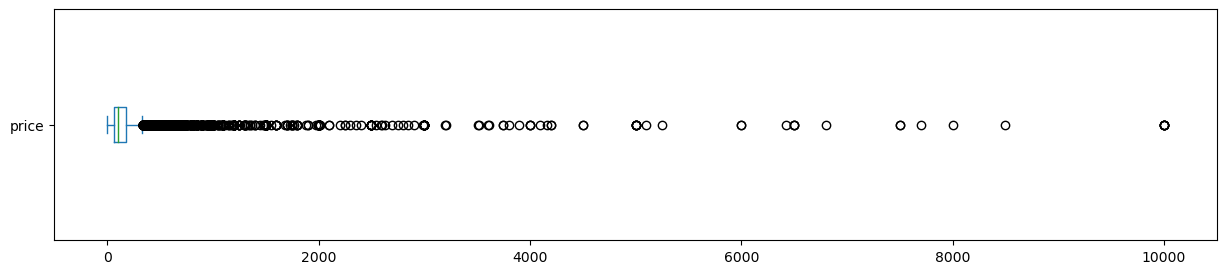

Values over $500.00: 
1044
2.1359%


Values equal to $0: 
11
0.0225%


In [22]:
#We find the that pice is even quoted as Zero so lets find out the number of occurances when price is Zero and more.

# Displaying the box plot
bnb1['price'].plot(kind='box', vert=False, figsize=(15,3))
plt.show()

# Calculating the number and the percentage of prices that are equal to 
500.00
print('Values over $500.00: ')
print(len(bnb1[bnb1['price'] > 500]))
print('{:.4f}%'.format((len(bnb1[bnb1['price'] > 500]) / bnb1.shape[0]) * 100))
print('\n')
print('Values equal to $0: ')
print(len(bnb1[bnb1['price'] == 0]))
print('{:.4f}%'.format((len(bnb1[bnb1['price'] == 0]) / bnb1.shape[0]) * 100))


In [23]:
#Similarly lets check for minimum_night
bnb1.minimum_nights.describe()

count    48879.000000
mean         7.011027
std         20.016000
min          1.000000
25%          1.000000
50%          3.000000
75%          5.000000
max       1250.000000
Name: minimum_nights, dtype: float64

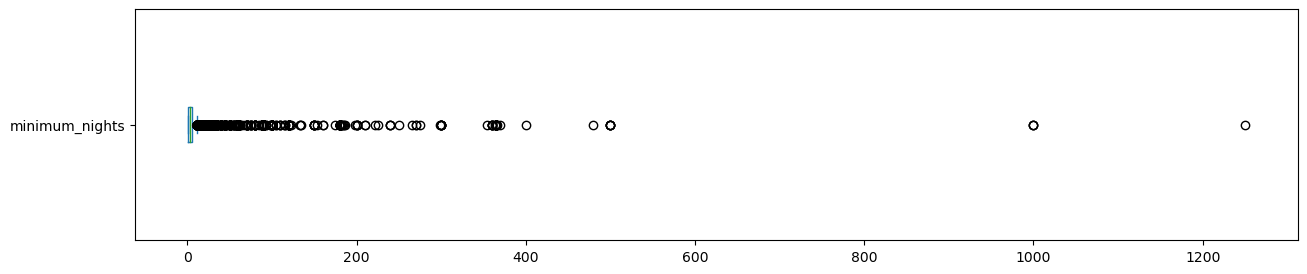

Values over 30 nights: 
746
1.5262%


In [24]:
# We see that minimum nights to be booked is going as high as 1250 days. 
# There are definitely outliers in this column as well so lets explore more. 
# Displaying the box plot
bnb1['minimum_nights'].plot(kind='box', vert=False, figsize=(15,3))
plt.show()

# Calculating the number and the percentage of rooms with the minimum nights value over 30
print('Values over 30 nights: ')
print(len(bnb1[bnb1['minimum_nights'] > 30]))
print('{:.4f}%'.format((len(bnb1[bnb1['minimum_nights'] > 30]) / bnb1.shape[0]) * 100))

In [25]:
#since hardly 3.5% of data is in outliers lets drop these Rows. 
bnb1 = bnb1[(bnb1['price'] <= 500) & (bnb1['price'] > 0) & (bnb1['minimum_nights'] <= 30)].copy()

In [26]:
##Let's find number of unique values in each Columns
bnb1.nunique(axis = 0)

id                                47110
name                              46157
host_id                           36245
neighbourhood_group                   5
neighbourhood                       219
room_type                             3
price                               454
minimum_nights                       30
number_of_reviews                   393
reviews_per_month                   938
calculated_host_listings_count       47
availability_365                    366
dtype: int64

### By this we understand that 'neighbourhood_group' & 'room_type' are the parameters on which we can compare diffrent aspects.

In [27]:
bnb1.room_type.unique()

array(['Private room', 'Entire home/apt', 'Shared room'], dtype=object)

In [28]:
bnb1.neighbourhood_group.unique()

array(['Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Bronx'],
      dtype=object)

In [29]:
# Lets check final form of Data
bnb1.shape

(47110, 12)

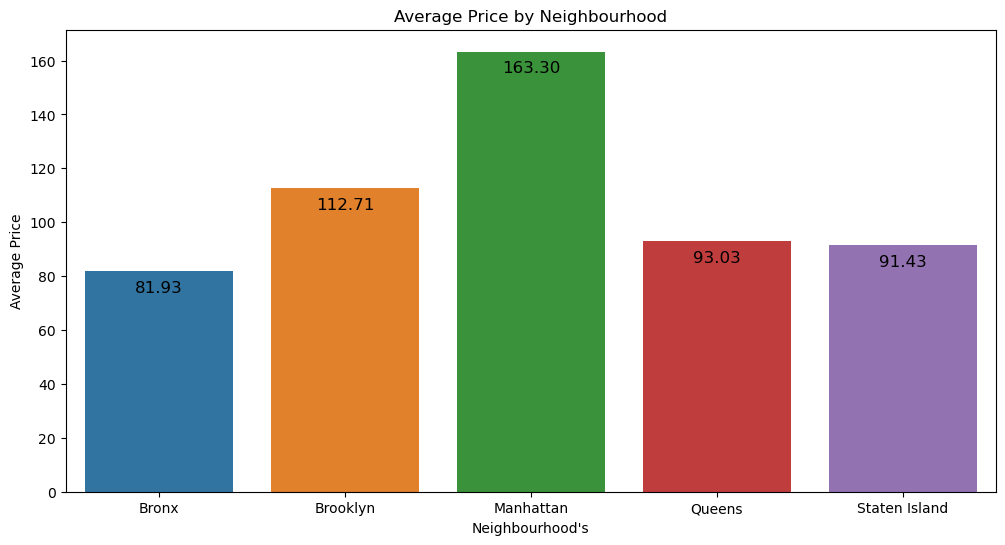

In [30]:
# Lets now compare the price of diffrent neighborhood.
df = bnb1[['neighbourhood_group', 'price']]
df = bnb1.groupby(['neighbourhood_group'], as_index=False)[['price']].mean()

plt.figure(figsize=(12, 6))
df = sns.barplot(x="neighbourhood_group", y="price", data=df)
for p in df.patches:
    df.annotate(format(p.get_height(), '.2f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', size = 12, 
                   xytext = (0, -12), textcoords = 'offset points')
    
plt.xlabel('Neighbourhood\'s')
plt.ylabel('Average Price')
plt.title('Average Price by Neighbourhood')
plt.show()


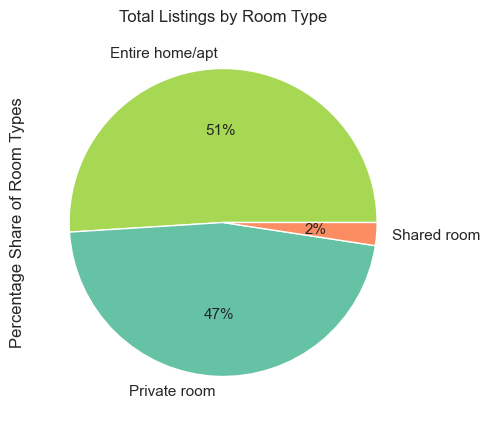

In [48]:
#Lets also figure out which type of room_type are booked the most

df2 = bnb1.groupby(['room_type'])['id'].count()
df2.plot.pie(ylabel='Percentage Share of Room Types', title='Total Listings by Room Type', 
            autopct= "%1.0f%%", fontsize='11', colors=['#a6d854', '#66c2a5', '#fc8d62', '#8da0cb', '#e78ac3'], 
             startangle=0, figsize=(7,5))
plt.show()

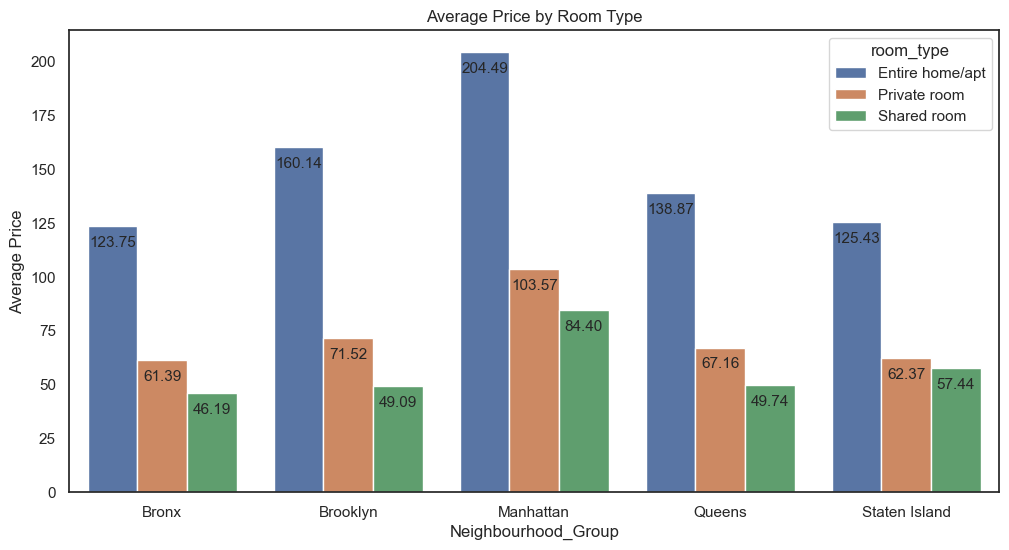

In [32]:
# Checking price of diifrent room type at diffrent Neighboourhood_Groups

df3 = bnb1[['neighbourhood_group', 'room_type', 'price']]
df3 = df3.groupby(['neighbourhood_group', 'room_type'], as_index=False)[['price']].mean()

plt.figure(figsize=(12, 6))
sns.set_theme(style='white')
df = sns.barplot(x="neighbourhood_group", y="price", data=df3, hue='room_type')
for p in df.patches:
    df.annotate(format(p.get_height(), '.2f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', size = 11, 
                   xytext = (0, -12), textcoords = 'offset points')
    
plt.xlabel('Neighbourhood_Group')
plt.ylabel('Average Price')
plt.title('Average Price by Room Type')
plt.show()

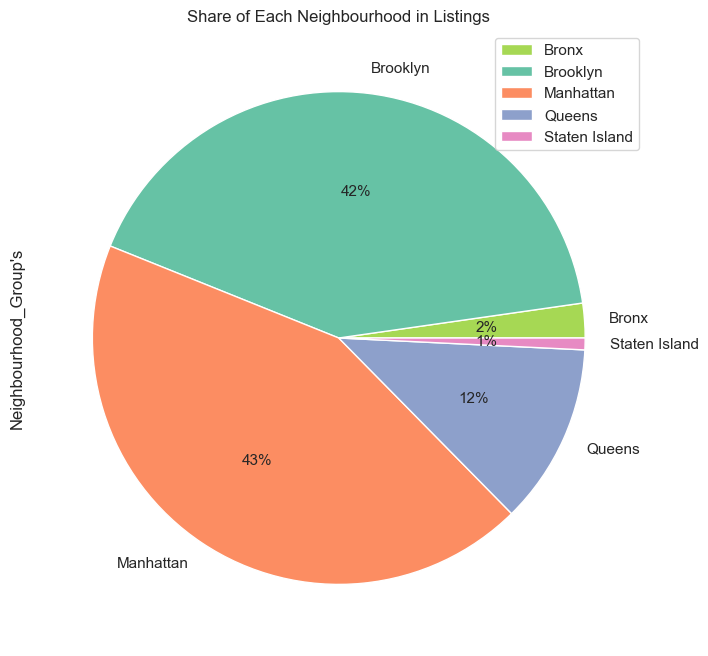

In [33]:
# Share of Each neighbourhood_group in Airbnb
# lets check percentage of Airbnb in different Neighborhoods_group

df4 = bnb1.groupby(['neighbourhood_group'])['id'].count()
df4.plot.pie(ylabel='Neighbourhood_Group\'s', title='Share of Each Neighbourhood in Listings',
              autopct='%1.0f%%', fontsize='11', colors=['#a6d854', '#66c2a5', '#fc8d62', '#8da0cb', '#e78ac3'],  
                          startangle=0, figsize=(10,8))
plt.legend()
plt.show()


In [34]:
#Lets check number of Zero nights available venues at different Neighbourhood_groups

In [35]:
df5 = bnb1[(bnb1['availability_365'] == 0)] 
df5.head(2)

,id,name,host_id,neighbourhood_group,neighbourhood,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Manhattan,East Harlem,Entire home/apt,80,10,9,0.10,1,0
8,5203,Cozy Clean Guest Room - Family Apt,7490,Manhattan,Upper West Side,Private room,79,2,118,0.99,1,0


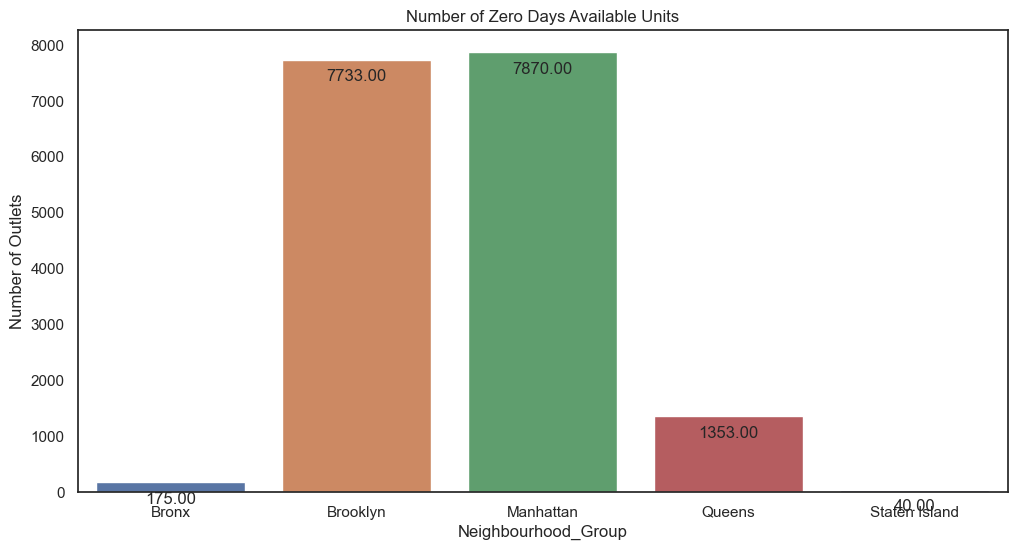

In [36]:
df6 = df5[['neighbourhood_group', 'availability_365']].copy()
df6 = df5.groupby(['neighbourhood_group'], as_index=False)[['availability_365']].count()

plt.figure(figsize=(12, 6))
df = sns.barplot(x="neighbourhood_group", y="availability_365", data=df6)
for p in df.patches:
    df.annotate(format(p.get_height(), '.2f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', size = 12, 
                   xytext = (0, -12), textcoords = 'offset points')
    
plt.xlabel('Neighbourhood_Group')
plt.ylabel('Number of Outlets')
plt.title('Number of Zero Days Available Units')
plt.show()

In [37]:
# Share of Zero days available Airbnb in each Neighbourhood_Group
#assuming 46175(count of unique name) as total number od listings in Airbnb
#data for 0 night AirBnb
bronx = 177/(46175*.02)*100
brooklyn = 7733/(46175*.41)*100
manhattan = 7870/(46175*.44)*100
queens = 1353/(46175*.12)*100
staten = 40/(46175*.01)*100

print('Following is the Percentage of listings which are showing availabe for 0 Nights')
print('Bronx =' , bronx)
print('Brooklyn =' , brooklyn)
print('Manhattan =' , manhattan)
print('Queens =' , queens)
print('Statten Island =' , staten)

Following is the Percentage of listings which are showing availabe for 0 Nights
Bronx = 19.16621548456957
Brooklyn = 40.84672573850806
Manhattan = 38.73603386326722
Queens = 24.41797509474824
Statten Island = 8.662696264212236


In [39]:
df6.rename(columns = {'availability_365':'availability_0'}, inplace = True)
df6.head()

,neighbourhood_group,availability_0
0,Bronx,175
1,Brooklyn,7733
2,Manhattan,7870
3,Queens,1353
4,Staten Island,40


In [49]:
df7 = bnb1.groupby(['neighbourhood_group'], as_index=False)[['availability_365']].count()
df8 = pd.concat([df6.set_index('neighbourhood_group'), df7.set_index('neighbourhood_group')], axis=1)


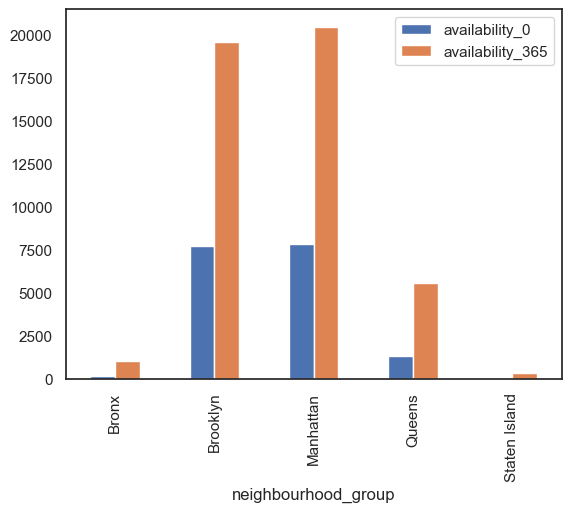

In [50]:
df8.head()
ax = df8.plot(kind='bar')
plt.show()

C:\Users\amann\AppData\Local\Temp\ipykernel_11072\2508971639.py:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  abnb_corr = bnb1.corr().copy()


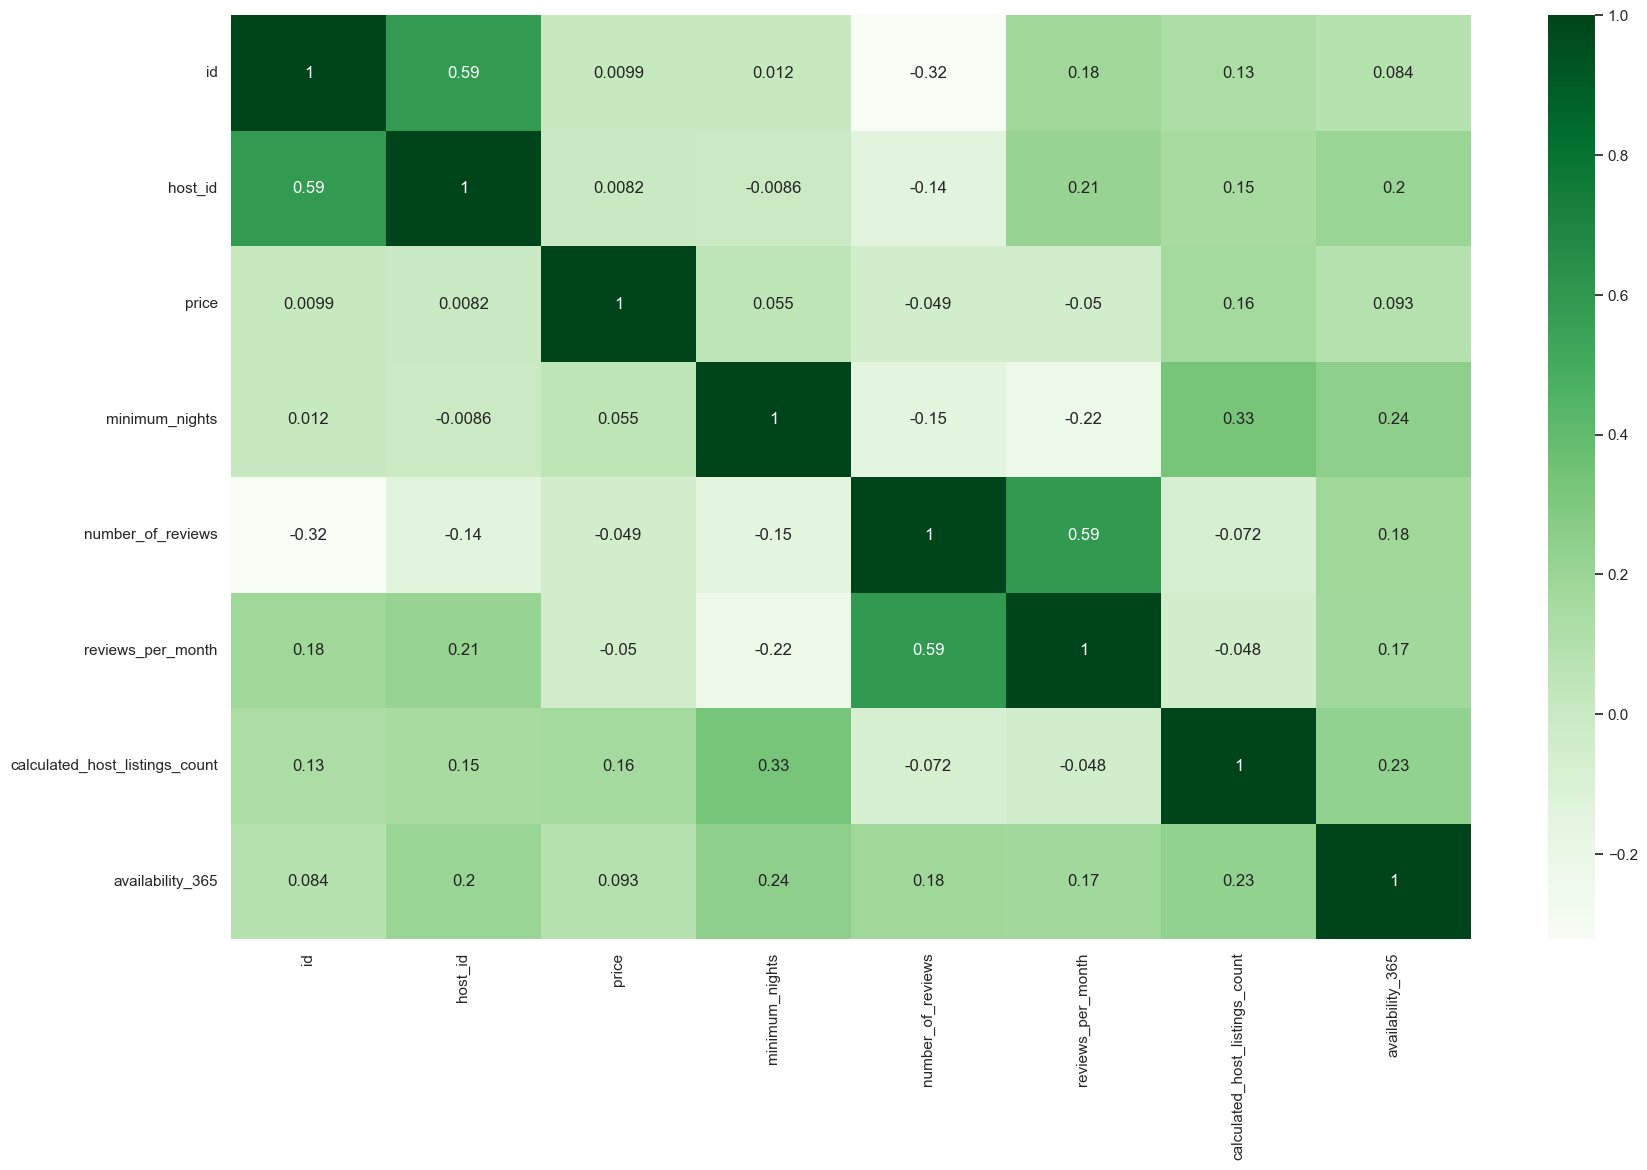

In [44]:
# Lets make a heatmap and find out if any other corelation we can determine

plt.figure(figsize=(20,12))


abnb_corr = bnb1.corr().copy()
_ = sns.heatmap(abnb_corr ,cbar=True,annot=True, cmap="Greens")

In [45]:
### we see that only 'reviews_per_month' and 'Id' are showing some signs of corelation indicating that 
### somce hosts are more efficient in getting reviews than others. 

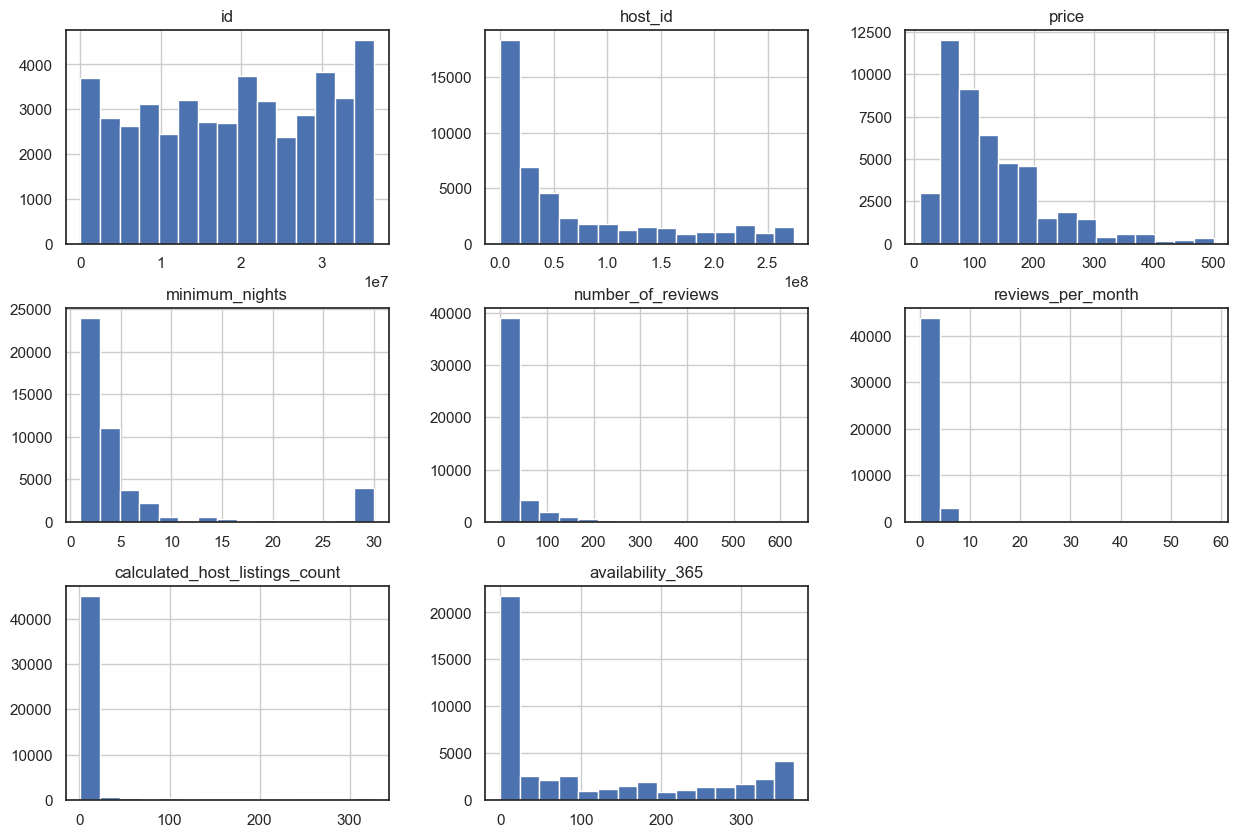

In [46]:
### Lets see if histogram can give any new insights
bnb1.hist(bins=15, figsize=(15,10));

In [47]:
#### Checking that lot of rooms are not available for rent !!!###
bnb1.availability_365.value_counts()

0      17171
365     1109
364      450
1        401
89       344
       ...  
195       25
183       24
196       23
181       23
202       20
Name: availability_365, Length: 366, dtype: int64

#Conclusion
From our investigation of the Airbnb NYC dataset, we found that the neighborhood, room type, have a relationship with the price of a listing. We also saw that the demand in different neighborhood groups and room types, which may imply an indirect relationship with price. Moreover, listings that are the entire home are generally more expensive than the other room types (private room or shared room). Interestingly, we also found that a large percentage of listings are showing 0 days/Nights availabilty in 'available_365' column. This might indicate that a property was earlier listed on Airbnb and now it's avialabity has gone due to being listed on some other platform or owner not being happy with Airbnb services. This is worth exploring into.